# PCA

We perform a Principal Component Analysis of the Life Expectancy Data set. PCA transforms the input columns into a lower-dimensional mathematical representation which carries most of the information of the original dataset in a compressed form.

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

In [87]:
import os
import pandas as pd

# These lines would load the data locally
#data_root = "./"
#filename = "Life_Expectancy_Data.csv"
#filepath = os.path.join(data_root, filename)

# We'll fetch it directly from the web
data_url = "https://aet-cs.github.io/white/ML/lessons/Life_Expectancy_Data.csv"
df = pd.read_csv(data_url)
target = "Life expectancy"    

df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [88]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [89]:
def get_data(filename):
    df = pd.read_csv(filename)
    return df    

For today's exercise we delete the Country feature because it carries too much information.

In [90]:
def pre_process_data(df):
    target = "Life expectancy"    
    df = df.drop("Country", axis = 1)
    
    # Use sklearn Imputers to fill in the categorical and numerical columns
    simple_median = SimpleImputer(strategy='median')
    simple_most_freq = SimpleImputer(strategy='most_frequent')
    
    num_cols = df.select_dtypes(include=np.number).columns # numerical data
    cat_cols = df.select_dtypes(include=object).columns # categorical data

    df[num_cols] = simple_median.fit_transform(df[num_cols])
    df[cat_cols] = simple_most_freq.fit_transform(df[cat_cols])
        
    return df

We add a method here to drop features. We will only use this sometimes, so it is not a part of "pre_process_data"

In [91]:
def feature_selection(df):
    df = df.drop(["under-five deaths", "Diphtheria", "thinness 1-19 years", "Polio"], axis = 1)
    return df

The random_state logic here is a bit different. We want randomized training set selection as the default so unless the caller sets `random_state=true`, we return a different training_set each time

In [92]:
def get_test_train(df, test_size = 0.2, random_state = False):
    X = df[:,0:-1]
    y = df[:,-1]
    if random_state:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    return X_train, X_test, y_train, y_test

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


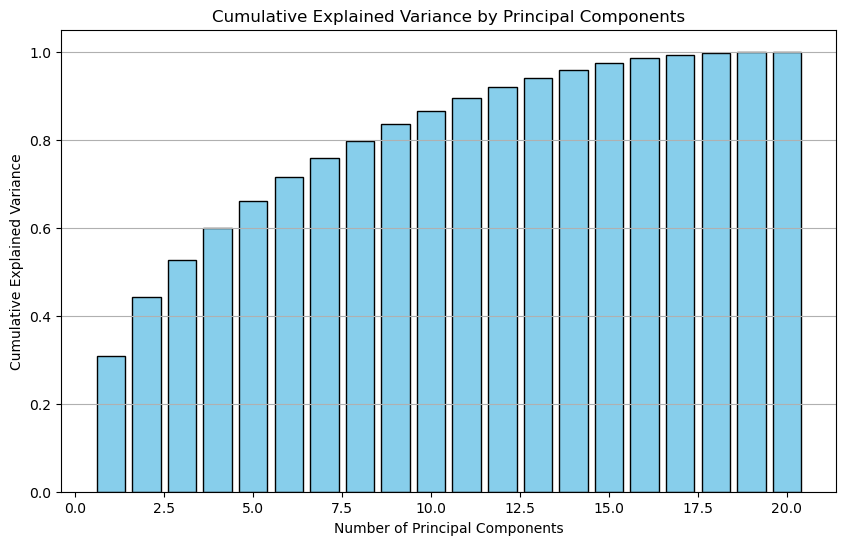

In [93]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = get_data(data_url)
print(df.columns)
df = pre_process_data(df)
# First, separate out the features you want to use in PCA
features = df.select_dtypes(include=['number']).columns  # Select numerical columns if needed
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
num_components = 20
pca = PCA(n_components=num_components)  # Start with 2 components for easy visualization
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, color='skyblue', edgecolor='k')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.ylim(0, 1.05)  # Set y-axis limits to show full cumulative range up to 100%
plt.grid(axis='y')
plt.show()

In [94]:
df = get_data(data_url)
df = pre_process_data(df)
# First, separate out the features you want to use in PCA

y = df[target]
df = df.drop(target, axis=1)

Now let's score a linear regression using our chosen number of components. Vary the number of components and see how the score changes. (Note this is a *different* measure from the graph above which is only looking at the X variance, *not* how well it fits Y)

In [95]:
features = df.select_dtypes(include=['number']).columns  # Select numerical columns if needed
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
num_components = 8
pca = PCA(n_components=num_components)  
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
print("Score = ", linreg.score(X_test, y_test))

Score =  0.7902158165870237


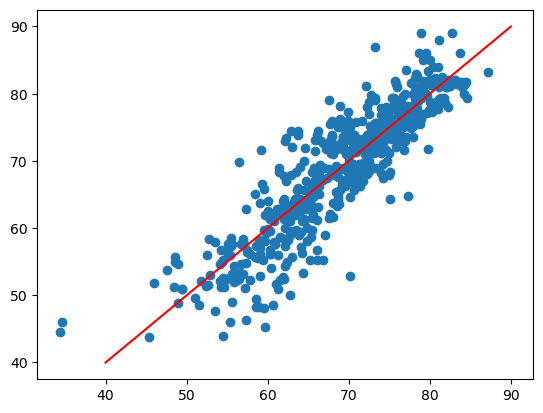

In [96]:
plt.scatter(linreg.predict(X_test), y_test);
plt.plot([40,90],[40,90], color='red');

In [97]:
X_scaled.shape

(2938, 19)